# Timelapse by hand
We will practise how to analyse timelapse data by hand inversion using both the ERTManager and the command line.
Hypothetical scenario is a tracer injection into a shallow aquifer.

First we do some modelling:
1. Generate a two-layer model 
1. do a forward calculation with gradient data - baseline data0.dat
2. Introduce a conductive body and compute data1.dat
3. Compute the ratio between the two simulations and plot it using `pb.plotERTData(data, vals=)`
4. Move the block in the model or enlarge it, create new data `data2.data` and have a look at the ratio to the baseline and the preceding step.

In [73]:
# first all the imports
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
import pybert as pb

In [88]:
# baseline
world = mt.createWorld(start=[-20, 0], end=[60, -15], layers=[-2])
ex = np.arange(start=0.0, stop=40.1, step=1.0)
# The electrodes are added to a mesh along with a refinement point
for xi in ex:
    world.createNode([xi, 0])
    world.createNode([xi, -0.2])

(<matplotlib.axes._subplots.AxesSubplot at 0x26db56e1e48>, None)

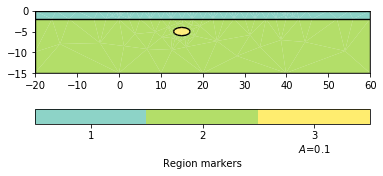

In [89]:
# First time step
blop = mt.createCircle(pos=[15, -5], radius=[2, 1], marker=3, area=0.1)
geo1 = mt.mergePLC([world, blop])
pg.show(geo1)

(<matplotlib.axes._subplots.AxesSubplot at 0x26db56ff208>, None)

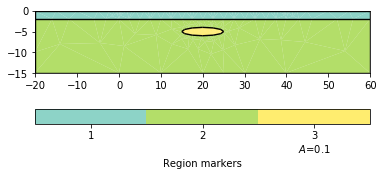

In [90]:
blop2 = mt.createCircle(pos=[20, -5], radius=[5, 1], marker=3, area=0.1)
geo2 = mt.mergePLC([world, blop2])
pg.show(geo2)

(<matplotlib.axes._subplots.AxesSubplot at 0x26db575d4e0>, None)

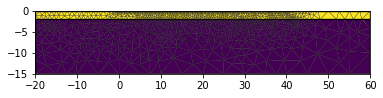

In [91]:
scheme = pb.createData(elecs=ex, schemeName='slm')
rhobase = [[1, 500], [2, 100]]
ert = pb.ERTManager()
mesh = mt.createMesh(world, quality=34.4)
pg.show(mesh, rhobase, showMesh=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x26db5b502e8>,
 <matplotlib.colorbar.Colorbar at 0x26db5f3a940>)

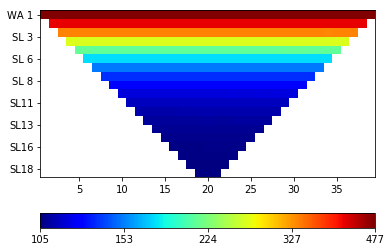

In [92]:
data = ert.simulate(mesh, scheme=scheme, res=rhobase)
pb.plotERTData(data)

(<matplotlib.axes._subplots.AxesSubplot at 0x26db5efdd68>,
 <matplotlib.colorbar.Colorbar at 0x26db600b4a8>)

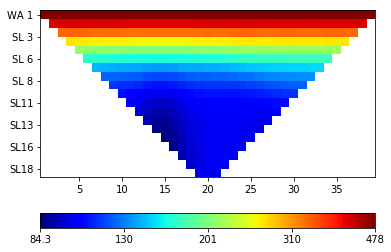

In [93]:
mesh = mt.createMesh(geo1, quality=34.4)
rhotime = rhobase + [[3, 5]]
data1 = ert.simulate(mesh, scheme=scheme, res=rhotime)
pb.plotERTData(data1)

Now we do some inversion using the ERT manager.

(<matplotlib.axes._subplots.AxesSubplot at 0x26db5dd7e48>,
 <matplotlib.colorbar.Colorbar at 0x26db70a7e80>)

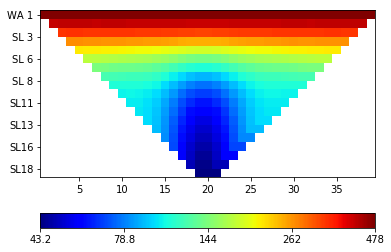

In [94]:
mesh = mt.createMesh(geo2, quality=34.4)
data2 = ert.simulate(mesh, scheme=scheme, res=rhotime)
pb.plotERTData(data2)